# Communicate Data Findings: 2019 Ford Go-Bike Project
### Udacity DataAnalysis NanoDegree October, 2022.
### Prepared By: Alagbe Oluwapelumi Olaoluwa


## Investigation Overview


> In this investigation, I will go deeper on the 2019 dataset and focus my study on the riders basic data(characteristics) which includes gender, age, user type, location and their effect on the biking duration. Also, I will investiage the bikers the preferred hour of the day and day of the week for bikers.

## Dataset Overview

> The data consisted of prices and attributes of approximately 180,500 trips. The attributes included the characterstics such as : duration_sec, start_time, end_time, user_type, start_station_name and end_station_name. Eight thousand three hundred and sixteen data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
## load in the dataset into a pandas dataframe
bike = pd.read_csv('fordbike.csv')
bike.head()


Unnamed: 0  duration_sec  duration_minutes  duration_hours  duration_days  \
0           0         52185        869.750000       14.495833       0.603993   
1           1         61854       1030.900000       17.181667       0.715903   
2           2         36490        608.166667       10.136111       0.422338   
3           3          1585         26.416667        0.440278       0.018345   
4           4          1793         29.883333        0.498056       0.020752   

  start_day end_day               start_time                 end_time  \
0  Thursday  Friday  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1  Thursday  Friday  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
2  Thursday  Friday  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
3  Thursday  Friday  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
4  Thursday  Friday  2019-02-28 23:49:58.632  2019-03-01 00:19:51.760   

   start_station_id     ...     end_station_id  \
0              21.0     ...               13.0   
1              86.0     ...                3.0   
2             375.0     ...               70.0   
3               7.0     ...              222.0   
4              93.0     ...              323.0   

                               end_station_name bike_id   user_type  \
0                Commercial St at Montgomery St  4902.0    Customer   
1  Powell St BART Station (Market St at 4th St)  5905.0    Customer   
2                        Central Ave at Fell St  6638.0  Subscriber   
3                         10th Ave at E 15th St  4898.0  Subscriber   
4                            Broadway at Kearny  5200.0  Subscriber   

  member_birth_year  member_gender bike_share_for_all_trip member_age  \
0            1984.0           Male                      No         38   
1            1972.0           Male                      No         50   
2            1989.0          Other                      No         33   
3            1974.0           Male                     Yes         48   
4            1959.0           Male                      No         63   

   start_hour  period_day  
0          17   afternoon  
1          12   afternoon  
2          17   afternoon  
3          23       night  
4          23       night  

[5 rows x 21 columns]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### Distribution of Users : Subscribers/Customers

#### This slide establishes the fact that a vast majority of users are Subscribers rather than normal customers.

In [3]:
# Use the same pokemon dataset
sorted_counts = bike['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');



# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')

(-1.1073438004106799,
 1.1072112401416903,
 -1.1054115374334084,
 1.1091435031189618)

### Distribution of Gender: Male/Female

#### This slide establishes the fact that a vast majority of users are Male(128546) rather than Female(40128) and Other with 3595

In [4]:
# Function to plot Univariate Barplots with specified X-Label.
def funcbarplot(bike, x):
    mg=bike.groupby(x).size()
    plt.figure(figsize = (8,4))
    sb.barplot(x = mg.index, y = mg.values)
    plt.title(f"{x}" , y = 1.05,  fontsize = 14, fontweight = 'bold')
    plt.xlabel(f'{x} Type')
    plt.ylabel('Number of Members')
    plt.show()
    

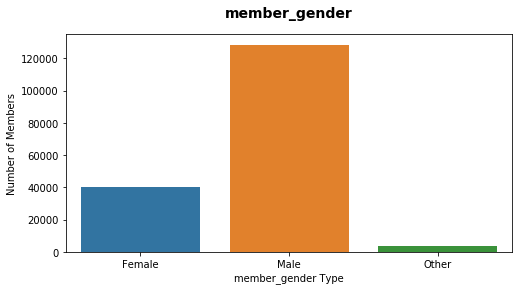

In [5]:
funcbarplot(bike,'member_gender')

### Distribution of Age: Memeber Age

#### This slide establishes the fact that a vast majority of users are between 18 to 50 years old.

In [6]:

# Visualizing the data in a histogram
age_bins = np.arange(15, 80+5, 5)
plt.hist(data = bike, x = 'member_age', bins = age_bins);
plt.style.use('seaborn')
plt.title('Number of Rides Based on Age of Member', y = 1.05, fontsize = 14, fontweight = 'bold');
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

### Distribution of Location : Top 10 start station location

#### Market St at 10th St is rank first where users start their trip.

In [7]:
# Subset the dataset by keeping only top 10 locations with high traffics, bike_top10. 
locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St','Powell St BART Station (Market St at 5th St)']

bike_top10 = bike.loc[bike['start_station_name'].isin(locs)]

# After subsetting top 10 station with the most trip, I create a countplot to see the distribution and order from top 1 to top 10
start_counts = bike_top10['start_station_name'].value_counts()
start_order = start_counts.index

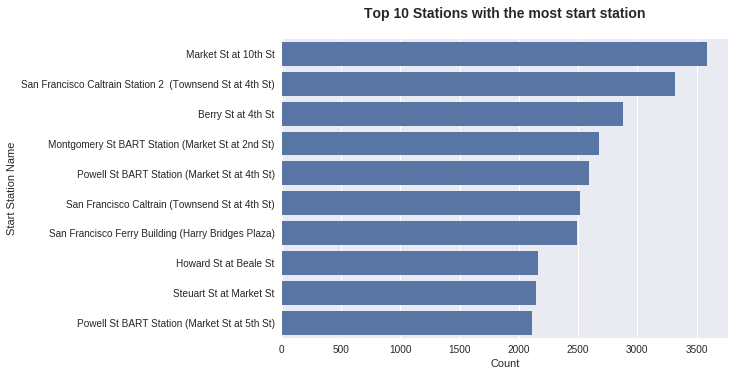

In [8]:
base_color = sb.color_palette()[0]
sb.countplot(data=bike_top10, y='start_station_name', color=base_color, order=start_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations with the most start station', y = 1.05, fontsize = 14, fontweight = 'bold');

### Distribution of user type, gender on the top 10 locations

#### subscribers are more than customers in each station and likewise the trips for male riders are way more than in females.

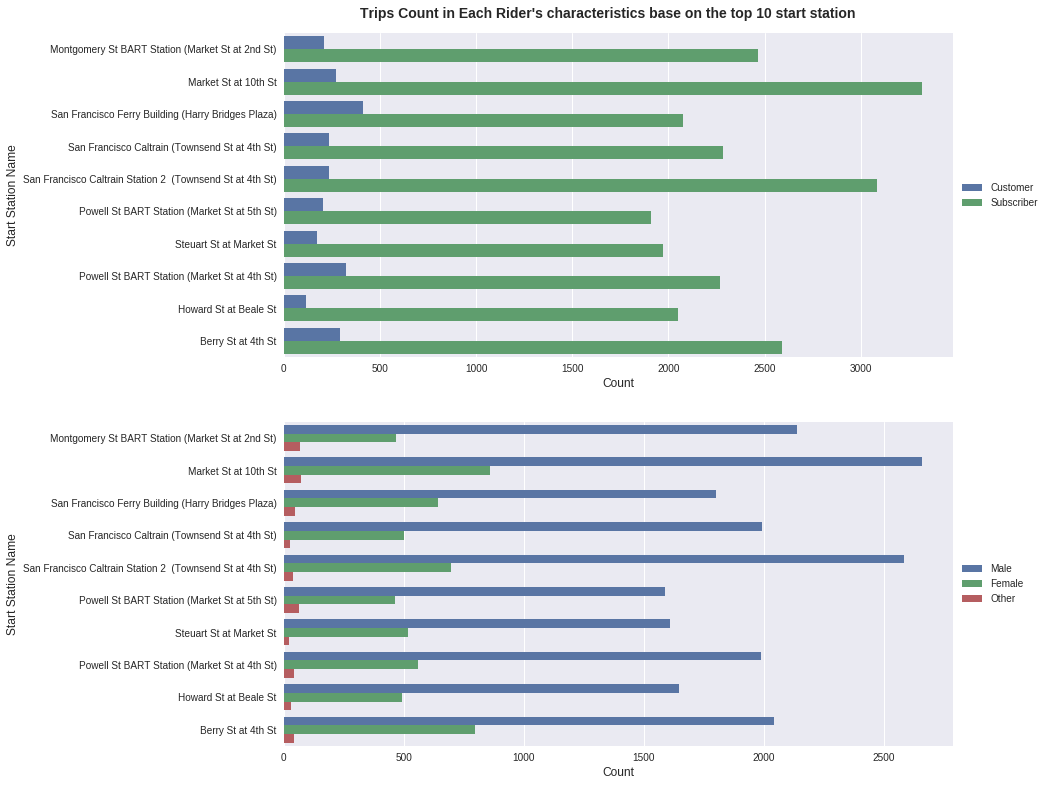

In [9]:
# Prepare lists of categorical variables
users_chr = ['user_type','member_gender']
# Categorical variables by plotting countplot: top 10 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s characteristics base on the top 10 start station', fontsize = 14, fontweight = 'bold')
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=bike_top10, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name', fontsize = 12)
    plt.xlabel('Count', fontsize = 12);

## Distribution of how the top 10 start station name users start their ride during the hour of the day.

####  The slide below shows that bigger number of users prefer ride bike in the morning at 8 am. 
####  Also, people in San Francisco Caltrain Station 2 (Townsend St at 4th St) start most of the rides at 8 am.

In [10]:
# ploting top 10 location base on time in hours
start = bike_top10['start_station_name'].value_counts().index[:4]
s_stations = bike_top10.loc[bike_top10['start_station_name'].isin(start)]
plt.figure(figsize = (15,6))
sb.countplot(data=bike_top10, x='start_hour', hue='start_station_name')
x_tick= np.arange(0,24,1)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.title('Top 10 location base on time in hours', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.show()

## Distribution of duration in which user ride.

This plot below indicates that women ride for longer periods than men whether customer or subscriber. I also note that there is an even distribution of genders between the two(2) user types subscribers and customers.

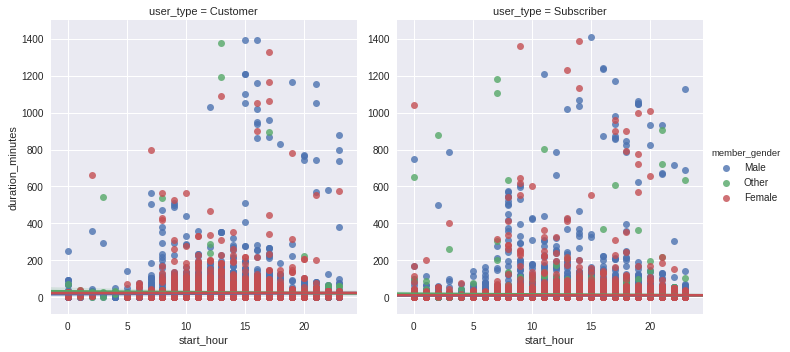

In [11]:
sb.lmplot(data=bike, x="start_hour", y="duration_minutes", hue="member_gender",
           col="user_type")

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 612889 bytes to Part_II_slide_deck.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
